# Red Neuronal con TensorFLow y Keras

Importamos las librerias necesarias

In [31]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numba 
from numba import cuda
import numpy as np

In [3]:
print('Número de GPUs disponibles:' , len(tf.config.list_physical_devices('GPU')))

Número de GPUs disponibles: 1


Importo el Dataframe de train ajustado 

In [4]:
df = pd.read_csv("df_train2.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [6]:
df.shape

(410000, 23)

In [7]:
df.head()

,Unnamed: 0,Long_duration,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,4,2
1,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,3,0
2,2,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2,2
3,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,3,1
4,4,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,7,1


In [8]:
df['Long_duration']

0         0
1         1
2         0
3         0
4         1
         ..
409995    0
409996    1
409997    1
409998    1
409999    0
Name: Long_duration, Length: 410000, dtype: int64

Separo en df_entrada solo las columnas que voy a utilizar para entrenar la red neuronal. EN EL DATAFRAME COMPLETO

In [9]:
df_entrada = df[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [10]:
df_salida = df['Long_duration']

Escojo una muestra aleatoria del total de los datos y le elimino la columna 'Long_duration' en donde se encuentra el dato que quiero predecir

In [11]:
df_Sample = df.sample(n = 2000)

In [12]:
df_SampleEntrada = df_Sample[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [13]:
df_SampleSalida = df_Sample['Long_duration']

In [14]:
df_Sample.shape

(2000, 23)

In [15]:
df_SampleEntrada.shape

(2000, 21)

In [16]:
df_SampleSalida.shape

(2000,)

Creamos la red neuronal y entrenamos la red neuronal

In [17]:
oculta1 = tf.keras.layers.Dense(units = 22 , input_shape=(21,))
oculta2 = tf.keras.layers.Dense(units = 21)
oculta3 = tf.keras.layers.Dense(units = 25)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)
 #, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [ ]:
oculta3 = tf.keras.layers.Dense(units = 20)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)

modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [18]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_error'
)

In [19]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_SampleEntrada.values, df_SampleSalida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
63/63 [==============================] - 1s 5ms/step - loss: 0.4515
Epoch 2/500
63/63 [==============================] - 0s 4ms/step - loss: 0.3343
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2782
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 5/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2512
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 8/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2471
Epoch 9/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2454
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2439
Epoch 11/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 12/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2410
Epoch 13/

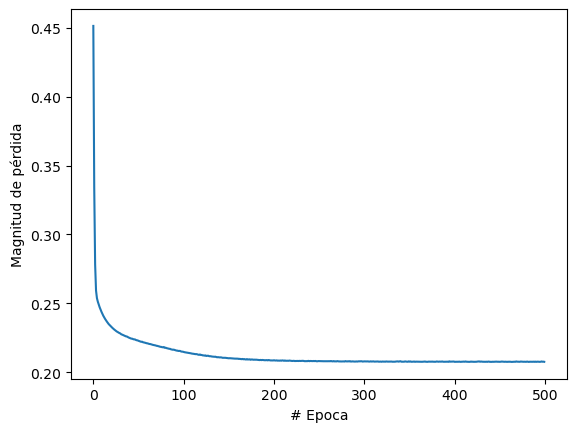

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(salida.get_weights())

In [ ]:
!Nvidia -msi

In [ ]:
import numpy as np

Seleccionamos los datos de DF con lo que vamos a hacer la predicción y la respuesta de estos para probar el modelo posteriormente

In [ ]:
df_prediccion = df.sample(n = 90000)

In [ ]:
df_prediccion_ENTRADA = df_prediccion[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [ ]:
df_prediccion_CORRECTAS = df_prediccion['Long_duration']

Hacemos prediciones con la red neuronal entrenada

In [21]:
df_train = pd.read_csv("df_test.csv") #importo el csv de los datos de test

In [27]:
df_train = df_train[['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity']]

In [28]:
df_prediccion = df_train.copy()

In [50]:
print("Predición de unos datos")
resultado = modelo.predict(df_prediccion.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [51]:
resultado = np.round(resultado, decimals=0)

In [52]:
resultado

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [59]:
respuesta = pd.DataFrame(resultado, columns=['pred'])
respuesta.head()

,pred
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [60]:
respuesta['pred'] = respuesta['pred'].astype(int)

In [61]:
respuesta.head()

,pred
0,0
1,1
2,1
3,1
4,1


In [63]:
respuesta.to_csv('alkymvaletta.csv', index=False)

Vemos los resultados

In [ ]:
print(classification_report(df_prediccion_CORRECTAS, resultado2))

## Transformación del DF de TEST

In [ ]:
df_test = []

In [ ]:
df_TESTdummis = pd.get_dummies(df_test, columns= ['Department', 'doctor_name', 'gender', 'Type of Admission', 'health_conditions', 'Insurance'], drop_first=False)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_TESTdummis['Age'])
df_TESTdummis['Age_le'] = le.transform( df_TESTdummis['Age'])

In [ ]:
df_TESTdummis['Severity'] = df_TESTdummis['Severity of Illness'].map({'Extreme': 2, 'Moderate': 1, 'Minor':0})['Severity'] = df_TESTdummis['Severity of Illness'].map({'Extreme': 2, 'Moderate': 1, 'Minor':0})

In [ ]:
df_TESTdummis =df_TESTdummis.drop(columns=['Available Extra Rooms in Hospital','Ward_Facility_Code' ])

In [ ]:
df_TESTdummis = df_TESTdummis.drop(columns=['staff_available', 'Age', 'Severity of Illness','Visitors with Patient', 'Admission_Deposit' ])

In [ ]:
df_TESTdummis= df_TESTdummis.drop(columns=['doctor_name_Dr Isaac','doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan','doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah','doctor_name_Dr Simon', 'doctor_name_Dr Sophia' ])